## RQ1.Was there a change in student performance during the pandemic?

## RQ2.Was school performance the same for elementary school and high school during the pandemic?

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('data/EF_EM_rede_localizacao_total.csv')
data

,Ano,Localização,Rede,Total - EF,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EM,1EM,2EM,3EM,4EM,Não-Seriado
0,2020,Total,Total,98.2,98.3,98.6,98.4,98.7,98.5,97.6,97.7,97.9,97.8,95.0,94.1,95.8,95.5,85.7,91.2
1,2019,Total,Total,92.8,98.5,97.5,91.4,94.1,94.7,87.9,89.1,91.0,92.3,86.1,80.5,87.3,92.5,88.9,85.1
2,2018,Total,Total,91.5,98.1,97.4,89.9,92.9,93.6,85.8,87.1,89.3,90.6,83.4,76.7,85.0,90.5,87.6,81.0
3,2017,Total,Total,91.0,98.0,97.2,89.5,92.8,93.1,84.5,86.5,88.7,89.6,83.1,76.4,84.7,90.5,85.2,84.5
4,2016,Total,Total,89.8,97.8,96.9,88.4,91.7,92.0,82.8,84.9,86.8,88.3,81.5,74.1,83.2,89.7,86.0,84.7
5,2015,Total,Total,89.9,97.7,96.8,88.5,91.7,92.1,82.9,84.6,87.3,88.6,81.7,74.6,83.6,89.5,87.7,84.2
6,2014,Total,Total,89.2,97.5,96.3,87.8,91.2,91.7,81.6,84.2,86.4,87.5,80.3,73.5,81.9,88.4,87.8,84.5
7,2013,Total,Total,89.3,97.4,95.8,88.5,91.6,91.2,82.2,84.5,86.8,87.6,80.1,73.2,82.0,88.0,88.0,83.1
8,2012,Total,Total,88.2,96.8,93.7,87.6,90.7,90.8,80.9,83.5,86.2,86.4,78.7,71.6,80.4,86.8,89.9,82.5
9,2011,Total,Total,87.6,96.5,91.9,87.1,90.9,90.5,80.1,83.4,85.2,85.5,77.4,70.2,79.4,85.5,88.3,79.4


In [25]:
data.Ano.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007], dtype=int64)

### The mean School Performance Rate (SPR) for Elementary School (ES)

In [26]:
print(data['Total - EF'].sum()/14)

89.01428571428572


### The mean School Performance Rate (SPR) for High School (HS)

In [27]:
print(data['Total - EM'].sum()/14)

80.67142857142858


In [28]:
# Constants
x_shift = 0.13
y_shift = 0.15
mean_ES = 89.01
mean_HS = 80.67
markersize=9

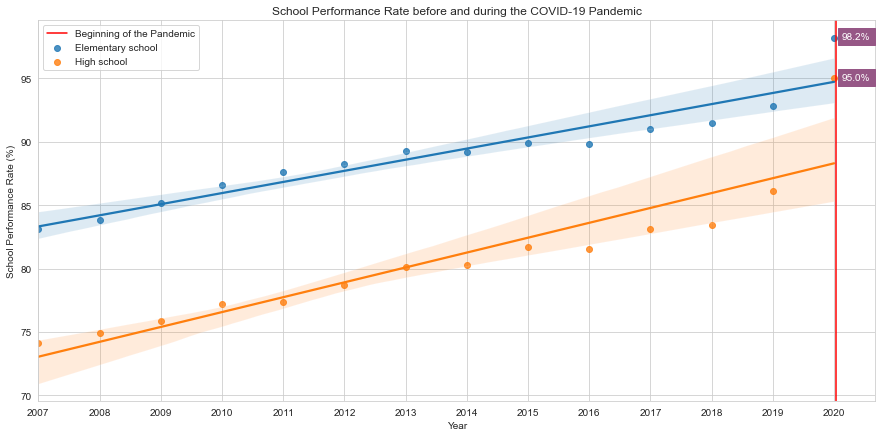

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
plt.title("School Performance Rate before and during the COVID-19 Pandemic")
ax = sns.regplot(data=data, x='Ano', y='Total - EF', label="Elementary school")
ax.set(xticks=data.Ano.values)
sns.regplot(data=data, x='Ano', y='Total - EM', label="High school")

y_2020_EM = data[data['Ano']==2020]['Total - EM'].iloc[0]
plt.text(2020+x_shift, y_2020_EM-y_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
y_2020_EF = data[data['Ano']==2020]['Total - EF'].iloc[0]
plt.text(2020+x_shift, y_2020_EF-y_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')

plt.xlabel("Year")
plt.ylabel("School Performance Rate (%)")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.legend()
plt.show()

## Before the Pandemic

### The School Performance Rate (SPR) for Elementary School (ES) has been higher than the school performance rate for High School (HS) since 2007. Even before the Pandemic, the mean SPR for ES was higher (89.01%) than the mean SPR for HS (80.67%).

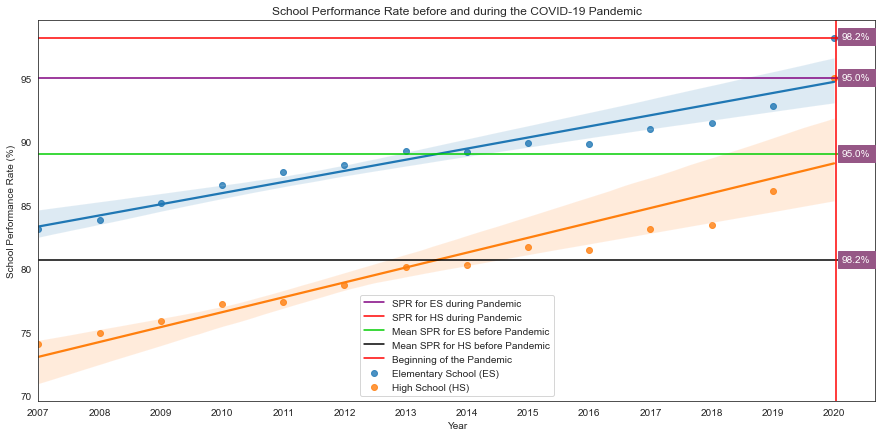

In [30]:
sns.set_style("white")
plt.figure(figsize=(15,7))
sns.regplot(data=data, x='Ano', y='Total - EF', label="Elementary School (ES)")
ax = sns.regplot(data=data, x='Ano', y='Total - EM', label="High School (HS)")
ax.set(xticks=data.Ano.values)
plt.xlabel("Year")
plt.ylabel("School Performance Rate (%)")

y_2020_EM = data[data['Ano']==2020]['Total - EM'].iloc[0]
plt.text(2020+x_shift, y_2020_EM-y_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
y_2020_EF = data[data['Ano']==2020]['Total - EF'].iloc[0]
plt.text(2020+x_shift, y_2020_EF-y_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')

plt.axhline(y=y_2020_EM, label="SPR for ES during Pandemic", color='purple', linestyle='-')
plt.axhline(y=y_2020_EF, label="SPR for HS during Pandemic", color='red', linestyle='-')


plt.axhline(y=mean_ES, label="Mean SPR for ES before Pandemic", color='#00CD00', linestyle='-')
plt.axhline(y=mean_HS, label="Mean SPR for HS before Pandemic", color='black', linestyle='-')

plt.text(2020+x_shift, mean_ES-y_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
plt.text(2020+x_shift, mean_HS-y_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')

plt.axvline(x=2020.025, label="Beginning of the Pandemic", color='red', linestyle='-')
plt.title("School Performance Rate before and during the COVID-19 Pandemic")
plt.legend()
plt.show()

## During the Pandemic

### The 2020 School Census data shows relevant particularities due to the COVID-19 pandemic, meaning that there was a change in student performance during the pandemic.

### As we can see from the visualization above, during the Pandemic, the SPR was not the same for Elementary School (ES) and High School (HS). The SPR for ES continued higher (98.2%) than the SPR for HS (95%).

### Nonetheless, still considering the Pandemic, both SPR for ES and HS had increased from the previous year (2019). In ES, the SPR increased 5.8% (from 92.8% to 98.2%), while in HS, the SPR increase was equivalent to 8.9% (from 86.1% to 95%).

### As a result of the Pandemic, the High School showed an unusual growth in the number of approved students, compared to what occurred in other years.

### One explanation for the increase of SPR in ES and HS is related to the fact that the Education managing entities recommended that the schools adjust the criteria for evaluating students considering the learning objectives effectively fulfilled, minimizing retention and school dropout.

### With the implementation of this strategy, many schools transferred to 2021 the challenge of fulfilling in integrality the learning objectives proposed by the National Common Curriculum Base (BNCC). In this case, schools did not retain students, given all the difficulties, and posponed the achievement of these goals to the 2021 year.
